In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import operator
import scipy as sp

In [16]:
data_location_AT = [r"C:\Users\Tim Huang\Desktop\Research\data\ATER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ATOriginal"]
data_location_CE = [r"C:\Users\Tim Huang\Desktop\Research\data\CEER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CEERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CEGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CEGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CEHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CESF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CESFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CESticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\CEOriginal"]
data_location_DM = [r"C:\Users\Tim Huang\Desktop\Research\data\DMER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\DMOriginal"]
data_location_EC = [r"C:\Users\Tim Huang\Desktop\Research\data\ECER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\ECOriginal"]
data_location_HS = [r"C:\Users\Tim Huang\Desktop\Research\data\HSER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\HSOriginal"]
data_location_MM = [r"C:\Users\Tim Huang\Desktop\Research\data\MMER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\MMOriginal"]
data_location_RN = [r"C:\Users\Tim Huang\Desktop\Research\data\RNER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\RNOriginal"]
data_location_SC = [r"C:\Users\Tim Huang\Desktop\Research\data\SCER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SCOriginal"]
data_location_SP = [r"C:\Users\Tim Huang\Desktop\Research\data\SPER",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPERDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPGEO",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPGEOGD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPHGG",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPSF",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPSFDD",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPSticky",
                 r"C:\Users\Tim Huang\Desktop\Research\data\SPOriginal"]

In [17]:
def distance(origin, other):
    return np.sum((origin - other) ** 2)**(1/2)

def read_data(path, header = None, seperator = ' '):
    return pd.read_csv(path, header = header, sep = seperator).iloc[:,:].values

def volume(dimensions, radius):
    return np.pi**(dimensions/2) * radius ** dimensions/ sp.special.gamma(dimensions/2 +1)

In [42]:
class NNDClass():
    def __init__(self, X, y):
        self.data = np.asarray(X)
        self.labels = np.asarray(y)
        self.dimensions = self.data.shape[1]
    
    def fit(self, X = None, y = None, *args, **kargs):
        if not X == None == y:
            if len(X) != len(y):
                print("X and y do not have the same length")
                raise NameError
            self.data = X
            self.labels = y
            
        densities = np.zeros((len(set(self.labels)),1))
        start_index = 0
        
        self.distance = defaultdict(lambda: defaultdict(list))
        for i in range(len(self.data)):
            shortests = self.distances(self.data[i])
            for key, shortest in shortests.items():
                self.distance[self.labels[i]][key].append(shortest)
        print("max",np.asarray([np.max(dist[label]) for label, dist in self.distance.items()]))
        print("Min",np.asarray([np.min(dist[label]) for label, dist in self.distance.items()]))
        print("median",np.asarray([np.median(dist[label]) for label, dist in self.distance.items()]))
        self.avg_density = np.asarray([np.mean(2/volume(self.data.shape[1],np.max(np.asarray(dist[label])/2))) for label, dist in self.distance.items()])
        print(self.distance)
         
    def distances(self, data):
        zeros = 0
        short_dist = defaultdict(int)
        for i in range(len(self.data)):
            expect_dist = distance(data, self.data[i])
            if expect_dist > 0 and (short_dist[self.labels[i]] > expect_dist or short_dist[self.labels[i]] == 0):
                short_dist[self.labels[i]] = expect_dist
            elif expect_dist == 0:
                zeros += 1
#         for key, b in short_dist.items():
#             if b == 0:
#                 print("For label", key, "there is a distance", 0, "for data:", data)
        if zeros != 1:
            print("found", zeros, "points with distance of 0")
        return short_dist
    
    def predict(self, point, raw = True, dist = False):
        min_dists = np.asarray([dist for dist in self.distances(point).values()])
        if dist:
            print(min_dists)
#         print(min_dists, self.avg_density)
        exp_points = self.avg_density*volume(self.dimensions, min_dists)
        predictions = exp_points * self.dimensions/min_dists * np.exp(-exp_points)
        cdf = np.exp(-exp_points)
        
        return cdf if raw else np.argmax(cdf)
    
    def score(self):
        count = 0
        correct = 0
        for i in range(self.data.shape[0]):
            if self.predict(self.data[i], False) == self.labels[i]:
                print(self.predict(self.data[i]), self.labels[i])
                correct += 1
            else:
                print(self.predict(self.data[i]), self.labels[i])
#                 pass
            count += 1
        return correct/count
    
    def getDetails(self):
        return self.distance

In [43]:
num = 3
cats = num if num <= 8 else 8
X = []
y = []
for i in range(cats):
        x = pd.read_csv(data_location_AT[i], header = None, sep = ' ').iloc[:,:].values
        for b in x:
            X.append(b)
            y.append(i)

# b = defaultdict(list)
x = X
X = np.asarray(X)
X = normalize(X)
test_class = NNDClass(X,y)
test_class.fit(averages_taken = 55)


max [0.00110684 0.03585125 0.00773486]
Min [4.23098601e-05 1.24730918e-03 1.62561575e-03]
median [0.00018618 0.00335823 0.00314588]
defaultdict(<function NNDClass.fit.<locals>.<lambda> at 0x000001E574E8BE58>, {0: defaultdict(<class 'list'>, {0: [0.0003275084499919428, 4.2309860071729545e-05, 0.00017866487485157108, 0.0003121713222833261, 0.00016353880177805299, 0.00018803248749502886, 0.00023347987211177405, 0.00013726931647611238, 0.00018617925093866085, 0.00012301030639448192, 0.00017716285553687281, 0.00010527612982643481, 0.00016057860161014097, 0.00014923680189989614, 0.00010384525536329674, 0.00046056573050923884, 0.0002890636102997304, 0.00014430329558047782, 0.0002890636102997304, 0.0002313548136556581, 0.00021229805128860184, 0.00031565929202382047, 0.00027713204065382674, 0.00036520525211983126, 0.00021894190899428572, 0.00014091854061106855, 0.00017002813223060507, 0.00015179130074478953, 0.0002305971069247023, 0.000251461777315309, 0.00024895986446167866, 0.0001723362394126

In [44]:
test_class.score()

[0.99999971 0.         0.        ] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[0.99999993 0.         0.        ] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[0.99193978 0.         0.        ] 0
[0.99999999 0.         0.        ] 0
[1. 0. 0.] 0
[0.99999999 0.         0.        ] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[0.9999999 0.        0.       ] 0
[1. 0. 0.] 0
[0.99999232 0.         0.        ] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[0.99999997 0.         0.        ] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[0.99999789 0.         0.        ] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[1. 0. 0.] 0
[0.99999999 0.      

[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1
[0. 1. 0.] 1

[0. 0. 0.] 2
[0.         0.         0.98880881] 2
[0.         0.         0.99998121] 2
[0.         0.         0.99420249] 2
[0.         0.         0.21848289] 2
[0.         0.         0.99997611] 2
[0.00000000e+00 0.00000000e+00 3.43516326e-06] 2
[0.         0.         0.99946739] 2
[0.         0.         0.99991051] 2
[0.         0.         0.99959739] 2
[0.         0.         0.99999235] 2
[0. 0. 0.] 2
[0.         0.         0.99991051] 2
[0.         0.         0.99999999] 2
[0.         0.         0.99015587] 2
[0.         0.         0.27370256] 2
[0. 0. 0.] 2
[0.         0.         0.99999693] 2
[0.         0.         0.98183501] 2
[0.         0.         0.23841035] 2
[0.         0.         0.99997062] 2
[0.         0.         0.28737436] 2
[0.        0.        0.9990706] 2
[0.         0.         0.99999934] 2
[0.         0.         0.96906729] 2
[0.         0.         0.61990833] 2
[0.         0.         0.94620595] 2
[0. 0. 1.] 2
[0.         0.         0.96585455] 2
[0.         0.

[0.         0.         0.99999957] 2
[0.         0.         0.71552332] 2
[0.         0.         0.79883788] 2
[0.         0.         0.82907232] 2
[0.        0.        0.8979637] 2
[0.         0.         0.98299225] 2
[0.        0.        0.9999849] 2
[0.         0.         0.99979089] 2
[0.         0.         0.99998497] 2
[0.         0.         0.99985023] 2
[0.         0.         0.98858037] 2
[0.         0.         0.99999966] 2
[0.         0.         0.99999719] 2
[0.         0.         0.98582823] 2
[0.         0.         0.99055917] 2
[0.         0.         0.00090876] 2
[0.         0.         0.99994316] 2
[0.         0.         0.99999305] 2
[0.         0.         0.99857434] 2
[0.         0.         0.99965756] 2
[0.00000000e+00 0.00000000e+00 2.45878812e-09] 2
[0.         0.         0.99999411] 2
[0.         0.         0.99015587] 2
[0.         0.         0.99994924] 2
[0.         0.         0.98927834] 2
[0.         0.         0.00075176] 2
[0.         0.         0.4977689

0.9833110814419226

In [81]:

volume(30, .001)*densities
# print(densities)

act_dists = np.asarray([3.30113322e-02,3.35897089e-02 ,3.30904425e-02, 3.26597414e-02, \
                        5.31279858e-01, 4.63218006e-04, 5.32315025e-03, 7.33244045e-01])
dists = np.asarray([1.11071737e-07, 1.16521486e-04, 1.17893231e-07, 9.77670029e-07,\
                    1.16789899e+00, 1.59357784e-04, 4.36398792e-04, 2.06500943e-03]) 

print(volume(30, dists/2)*densities)
print(volume(30, act_dists/2)*densities)

[1.90627353e-49 4.92560684e-34 7.16348531e-24 6.03019108e-62
 3.01265810e-52 9.43844970e-41 6.19578834e-64 6.85051241e-43]
[1.73897028e+112 2.54239075e+038 2.03107608e+139 3.05859379e+049
 3.35750814e-090 1.99035372e-032 1.88998421e-047 1.13847463e+032]


In [12]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris['data']
iris_target = iris['target']

error_train = []
error_test = []

iris_data = normalize(iris_data)
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_target,test_size = .2, random_state = 0)

iris_class = NNDClass(iris_data,iris_target)
iris_class.fit(averages_taken = 19)
print(iris_class.score())


found 2 points with distance of 0
found 2 points with distance of 0
max [0.07174592 0.04768865 0.03593876]
Min [0.00327567 0.00388429 0.00190112]
median [0.01318655 0.01409447 0.01336835]
defaultdict(<function NNDClass.fit.<locals>.<lambda> at 0x000001FDF41AB168>, {0: defaultdict(<class 'list'>, {0: [0.0032756706204552922, 0.019226329505059418, 0.005030450780238169, 0.011009965563476398, 0.012715138463328968, 0.016213456268549108, 0.010479932848561016, 0.005878763015391616, 0.011009965563476398, 0.011937901593370931, 0.0032756706204552922, 0.019897623605315187, 0.011937901593370931, 0.021705562159199616, 0.03956713244419293, 0.027124493965915313, 0.024863184286377665, 0.013657971283255773, 0.011268370921361197, 0.010479932848561016, 0.008122019427605752, 0.01517388924979574, 0.03267928137453192, 0.030278850884267867, 0.042056213324995775, 0.022216080285743033, 0.02782171626231526, 0.006713544285170913, 0.00903595236451866, 0.011221174637653222, 0.016346867169448626, 0.01534300229032184

[0. 0. 0.] 1
[0. 0. 0.] 1
[0. 0. 0.] 1
[0. 0. 0.] 1
[0. 0. 0.] 1
[0.00000000e+00 0.00000000e+00 1.67691169e-37] 1
[0. 0. 0.] 1
[0. 0. 0.] 2
found 2 points with distance of 0
[0.00000000e+00 4.37234559e-98 0.00000000e+00] 2
[0. 0. 0.] 2
[0. 0. 0.] 2
[0. 0. 0.] 2
[0.00000000e+000 9.63068367e-003 8.87226487e-134] 2
[0. 0. 0.] 2
[0.00000000e+000 3.03381636e-010 1.15426571e-147] 2
[0.00000000e+000 7.06872178e-120 0.00000000e+000] 2
[0.0000000e+000 1.3769776e-100 0.0000000e+000] 2
[0. 0. 0.] 2
[0. 0. 0.] 2
found 2 points with distance of 0
[0. 0. 0.] 2
0.8666666666666667


0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


1
2


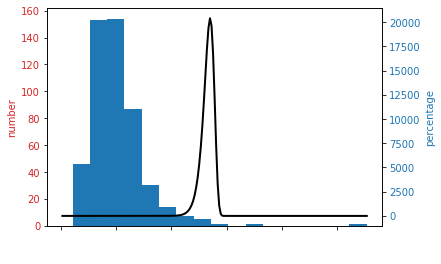

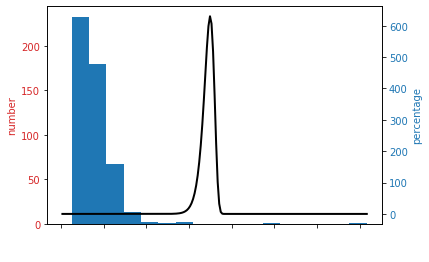

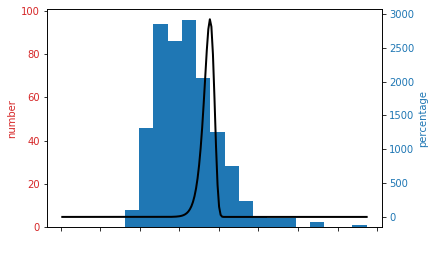

In [45]:
a = test_class
for key in a.getDetails():
    print(key)
    fig, ax1 = plt.subplots(1, 1)
    points = a.getDetails()[key][key]
    n, bins, patches = ax1.hist(points, bins = 17)
    
    ax1.set_ylabel('number', color="tab:red")
    ax1.tick_params(axis='y', labelcolor="tab:red")
    ax1.set_xlabel("distance", color = "white")
    ax1.tick_params(axis = 'x', labelcolor = "white")
    x = np.linspace(0,bins[-1],200)
    
    exp_points = a.avg_density[key] *volume(a.dimensions, x)
    pdf = exp_points * a.dimensions/x * np.exp(-exp_points)
    
    ax2 = ax1.twinx()
    ax2.plot(x, pdf, 'k-', lw=2, label='pdf')
    ax2.set_ylabel("percentage", color = "tab:blue")
    ax2.tick_params(axis='y', labelcolor= "tab:blue")